In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
# Load the Data LD2011_2014.txt
data = pd.read_csv('./LD2011_2014.txt', sep=';', decimal=',')


In [3]:
# Display the first 5 rows of the data
data.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Set date as index
data['Datetime'] = pd.to_datetime(data['Unnamed: 0'])
data = data.set_index('Datetime')

# Drop the first column
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Show the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


In [7]:
# Describe the data
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


In [8]:
# Check for missing values
data.isnull().sum()

MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length: 370, dtype: int64

In [9]:
# Check the count of missing values
data.isnull().sum().sum()

0

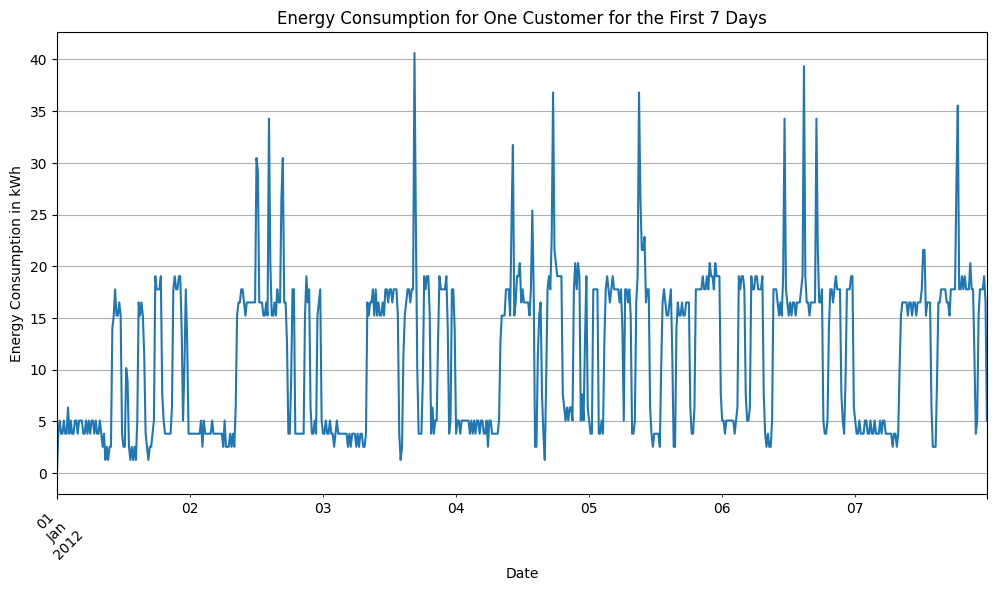

In [10]:
# Plot for the first customer
data['MT_001']['2012-01-01':'2012-01-07'].plot(figsize=(12, 6))
plt.title('Energy Consumption for One Customer for the First 7 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption in kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


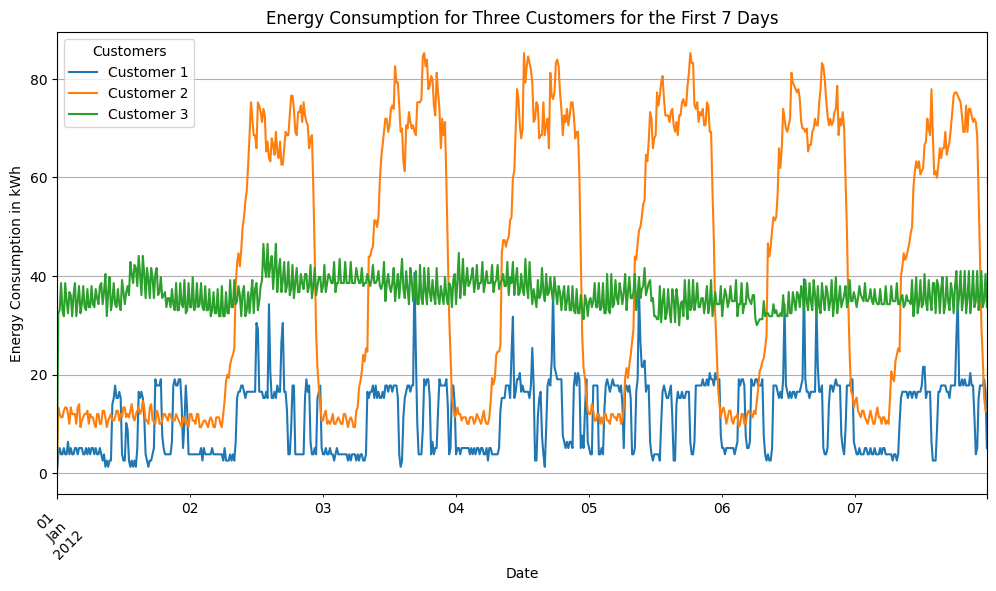

In [11]:
# Plot energy consumption for three users for the specified date range
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for the first customer
data['MT_001']['2012-01-01':'2012-01-07'].plot(ax=ax, label='Customer 1')

# Plot for the second customer
data['MT_100']['2012-01-01':'2012-01-07'].plot(ax=ax, label='Customer 2')

# Plot for the third customer
data['MT_150']['2012-01-01':'2012-01-07'].plot(ax=ax, label='Customer 3')

# Customize the plot
plt.title('Energy Consumption for Three Customers for the First 7 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption in kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Customers')
plt.show()


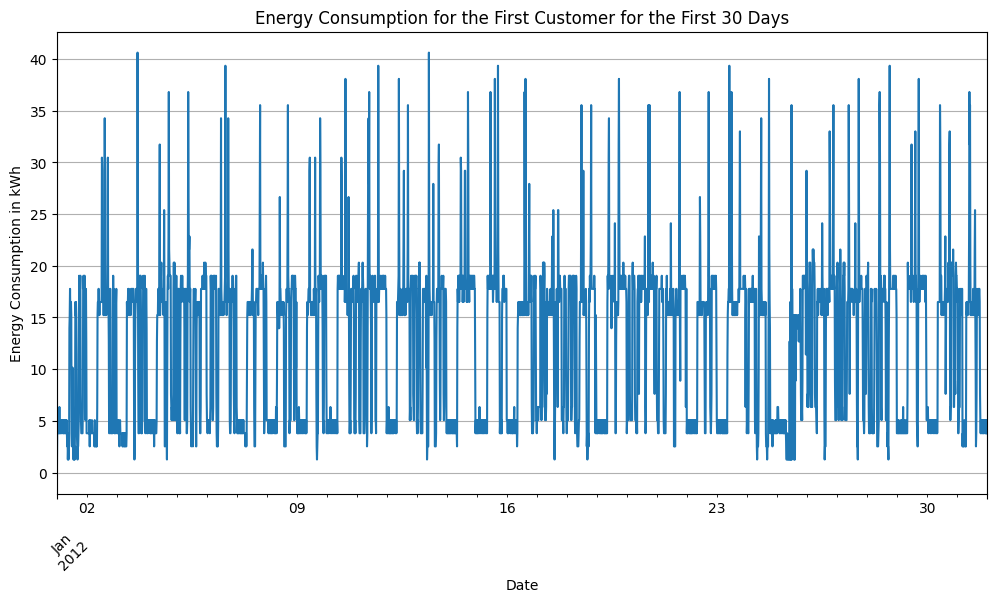

In [12]:
# From the first day where the energy consumption is not 0, plot the energy consumption for the first customer for the first 30 days
data['MT_001']['2012-01-01':'2012-01-31'].plot(figsize=(12, 6))
plt.title('Energy Consumption for the First Customer for the First 30 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption in kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

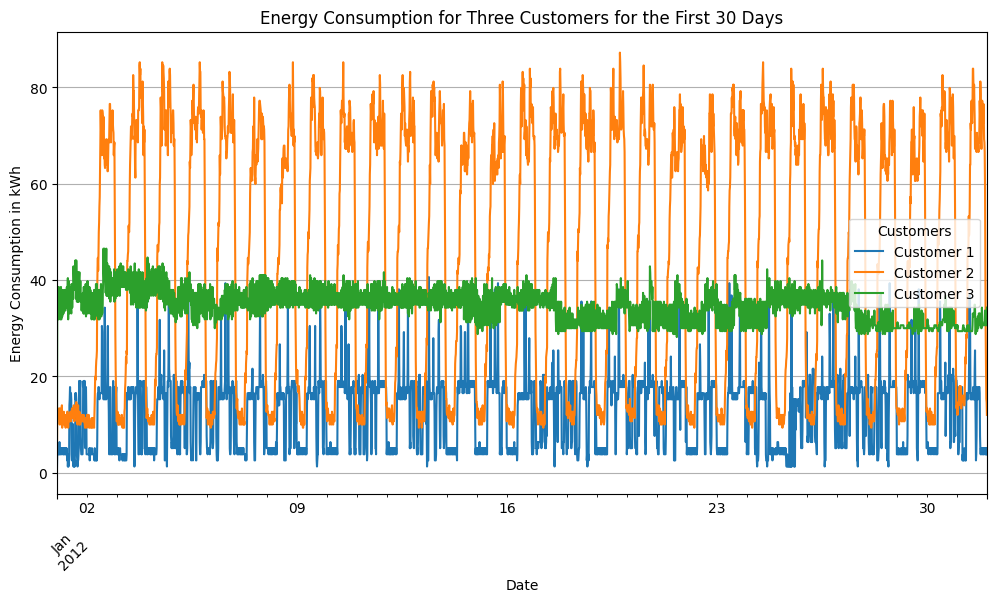

In [13]:
# Plot energy consumption for three users for the specified date range
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for the first customer
data['MT_001']['2012-01-01':'2012-01-31'].plot(ax=ax, label='Customer 1')

# Plot for the second customer
data['MT_100']['2012-01-01':'2012-01-31'].plot(ax=ax, label='Customer 2')

# Plot for the third customer
data['MT_150']['2012-01-01':'2012-01-31'].plot(ax=ax, label='Customer 3')

# Customize the plot
plt.title('Energy Consumption for Three Customers for the First 30 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption in kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Customers')
plt.show()


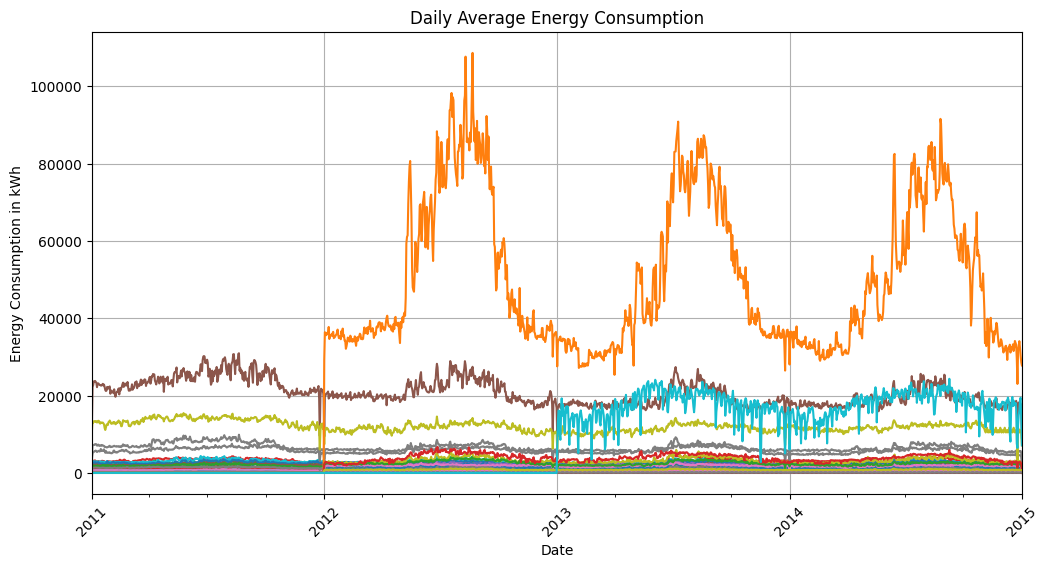

In [14]:
# Resample to daily averages
daily_avg = data.resample('D').mean()

# Plot the daily averages
fig, ax = plt.subplots(figsize=(12, 6))
daily_avg.plot(ax=ax, title='Daily Average Energy Consumption')

# Remove the legend
ax.get_legend().remove()

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Energy Consumption in kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

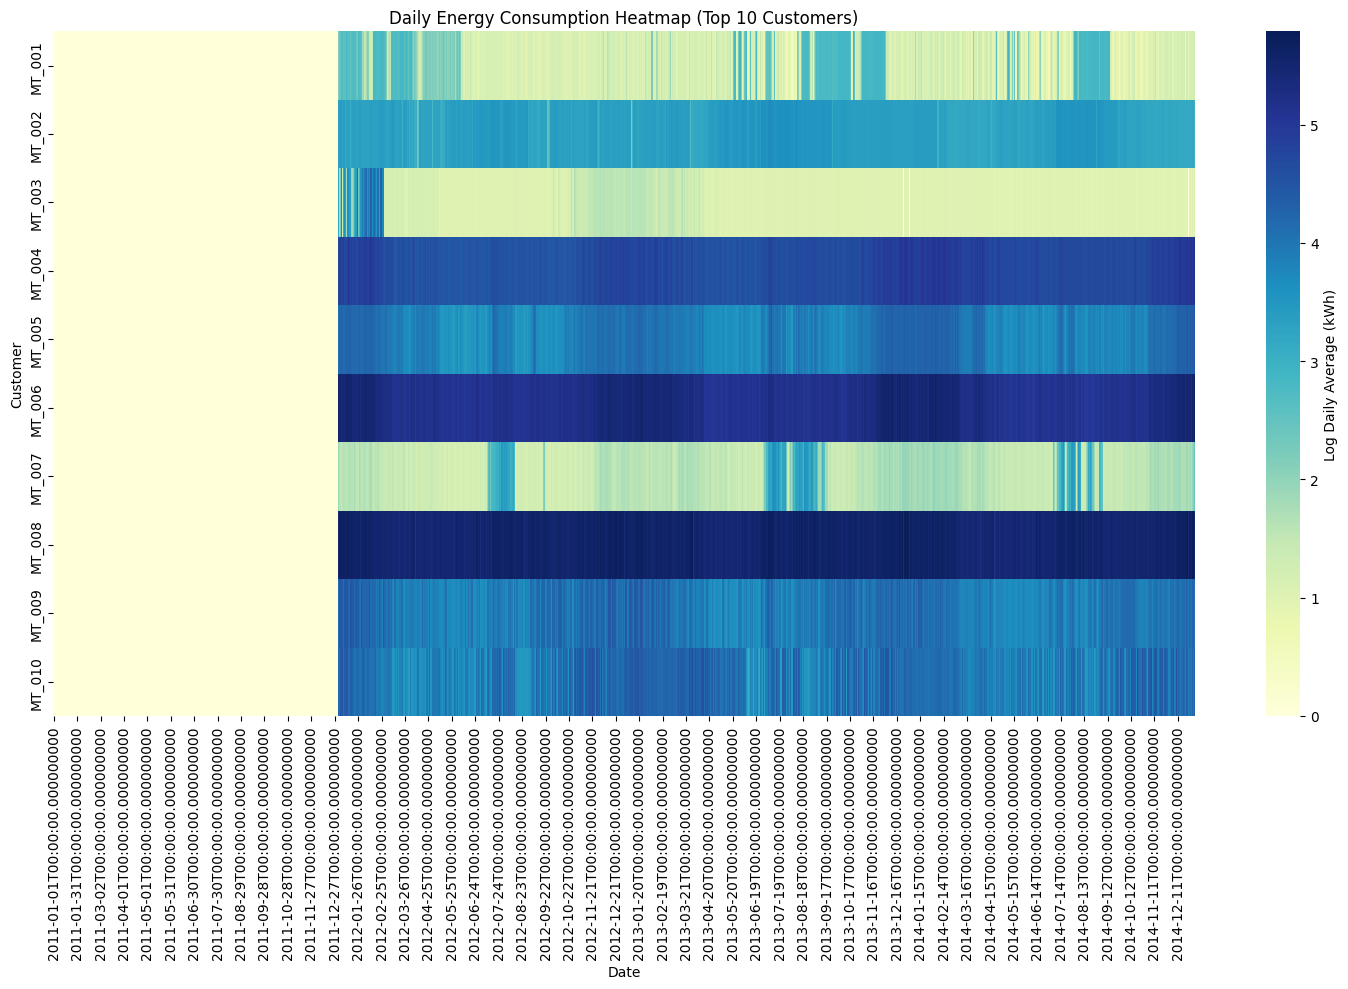

In [15]:
import seaborn as sns
import numpy as np

# Aggregate customers into clusters or sample a subset (e.g., top 20 customers)
subset_customers = data.iloc[:, :10].resample('D').mean()  # Resample to daily averages

# Apply normalization (optional)
normalized_data = np.log1p(subset_customers)  # Logarithmic transformation to handle outliers

# Create a heatmap
plt.figure(figsize=(15, 10))  # Adjust figure size
sns.heatmap(
    normalized_data.T,  # Transpose for better layout
    cmap='YlGnBu',
    cbar_kws={'label': 'Log Daily Average (kWh)'},
    xticklabels=30,  # Show one tick every 30 days
    yticklabels=True
)

plt.title('Daily Energy Consumption Heatmap (Top 10 Customers)')
plt.xlabel('Date')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

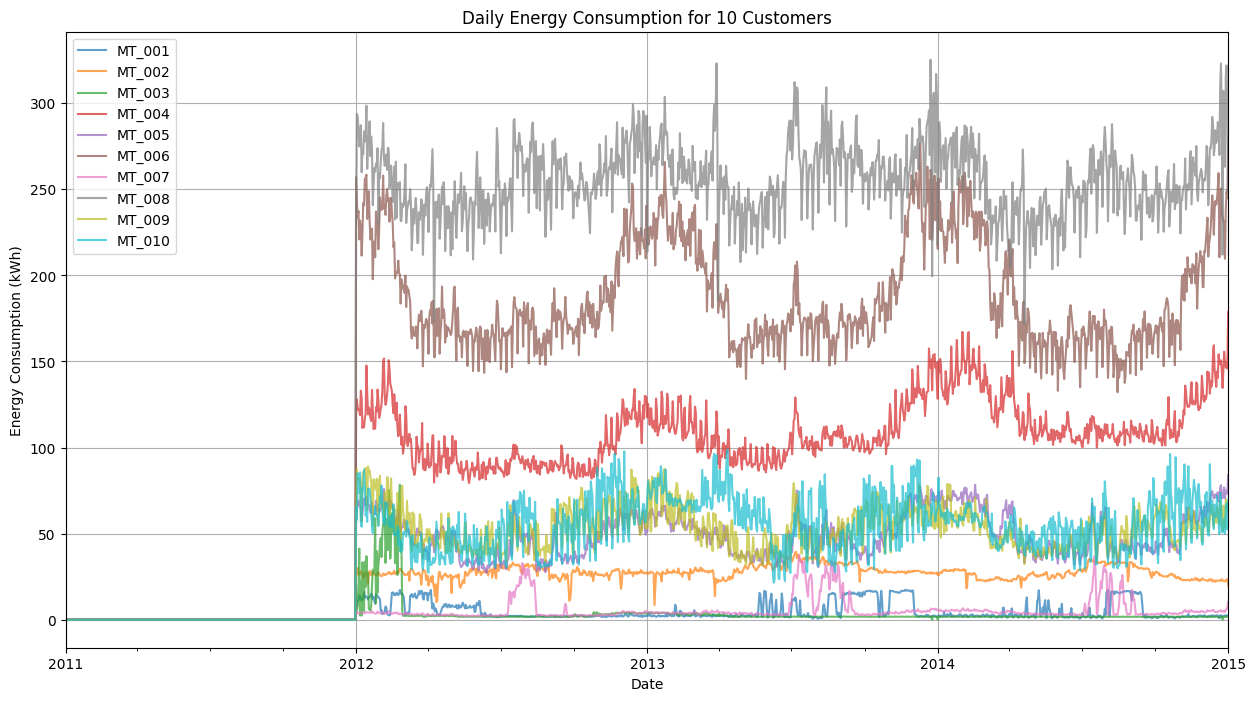

In [16]:
# Select a subset of customers (e.g., 10 customers)
selected_customers = daily_avg.iloc[:, :10]

# Plot
selected_customers.plot(figsize=(15, 8), alpha=0.7, title='Daily Energy Consumption for 10 Customers')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.show()

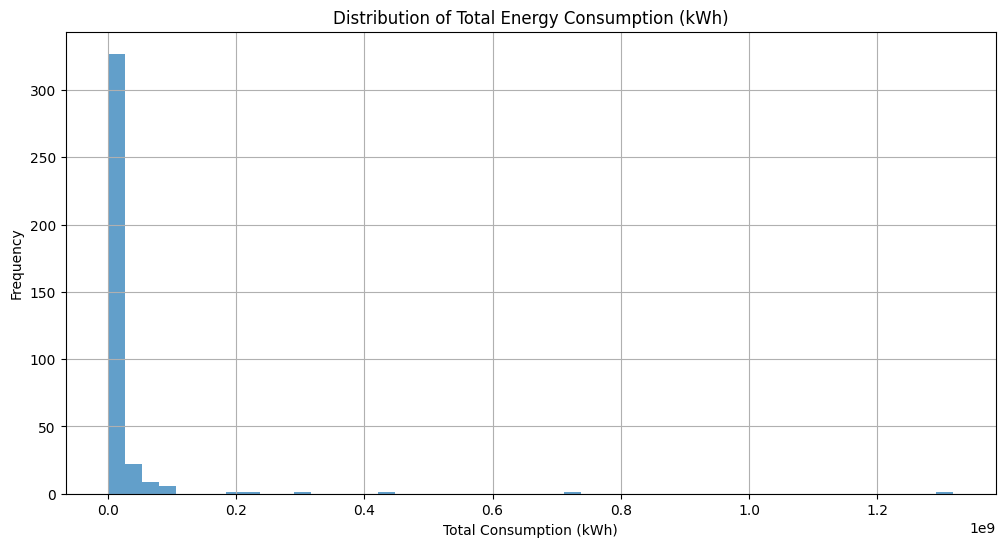

In [17]:
# Total consumption per customer
total_consumption = data.sum(axis=0) / 4  # Convert kW to kWh

# Plot histogram
total_consumption.plot(kind='hist', bins=50, figsize=(12, 6), alpha=0.7, title='Distribution of Total Energy Consumption (kWh)')
plt.xlabel('Total Consumption (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

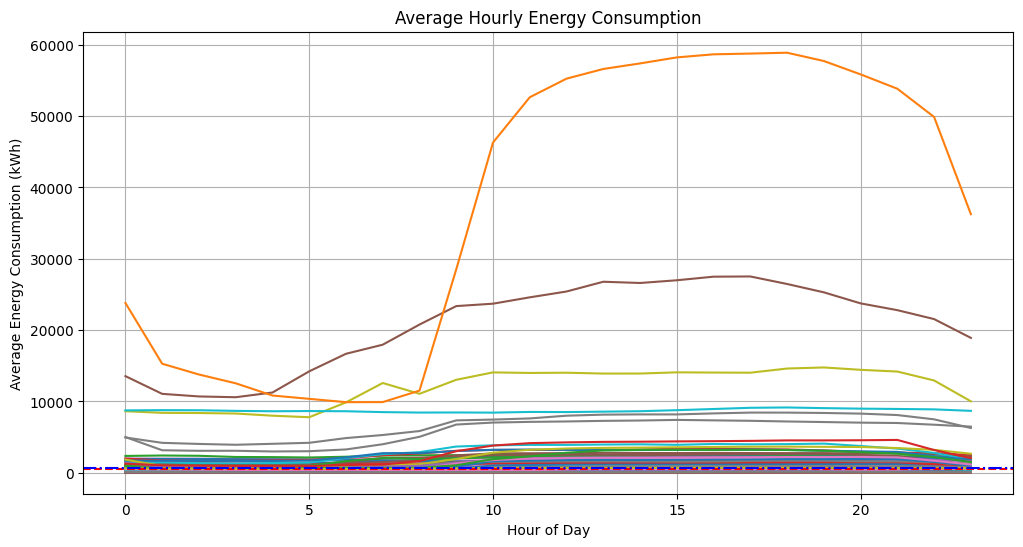

In [18]:
import matplotlib.pyplot as plt

# Resample to hourly averages
hourly_avg = data.resample('H').mean()

# Group by hour of the day
hourly_avg['Hour'] = hourly_avg.index.hour
avg_profile = hourly_avg.groupby('Hour').mean()

# Calculate mean and median
mean_consumption = avg_profile.mean()
median_consumption = avg_profile.median()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
avg_profile.plot(ax=ax, title='Average Hourly Energy Consumption')

# Add mean and median as horizontal lines
ax.axhline(mean_consumption.mean(), color='red', linestyle='--', label='Mean')
ax.axhline(median_consumption.mean(), color='blue', linestyle='-.', label='Median')

# Customize plot appearance
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (kWh)')
plt.grid(True)

# Remove legend
ax.get_legend().remove()

plt.show()

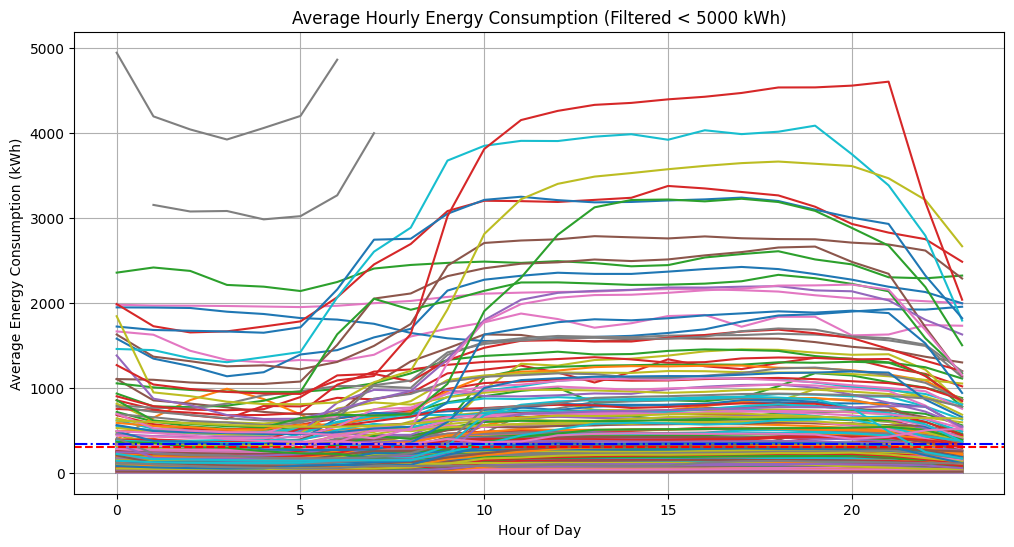

In [19]:
# Resample to hourly averages
hourly_avg = data.resample('H').mean()

# Group by hour of the day
hourly_avg['Hour'] = hourly_avg.index.hour
avg_profile = hourly_avg.groupby('Hour').mean()

# Filter values below 10,000 kWh
avg_profile_filtered = avg_profile[avg_profile < 5000]

# Calculate mean and median for filtered data
mean_consumption = avg_profile_filtered.mean()
median_consumption = avg_profile_filtered.median()

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
avg_profile_filtered.plot(ax=ax, title='Average Hourly Energy Consumption (Filtered < 5000 kWh)')

# Add mean and median as horizontal lines
ax.axhline(mean_consumption.mean(), color='red', linestyle='--', label='Mean')
ax.axhline(median_consumption.mean(), color='blue', linestyle='-.', label='Median')

# Customize plot appearance
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (kWh)')
plt.grid(True)

# Remove legend
ax.get_legend().remove()

plt.show()

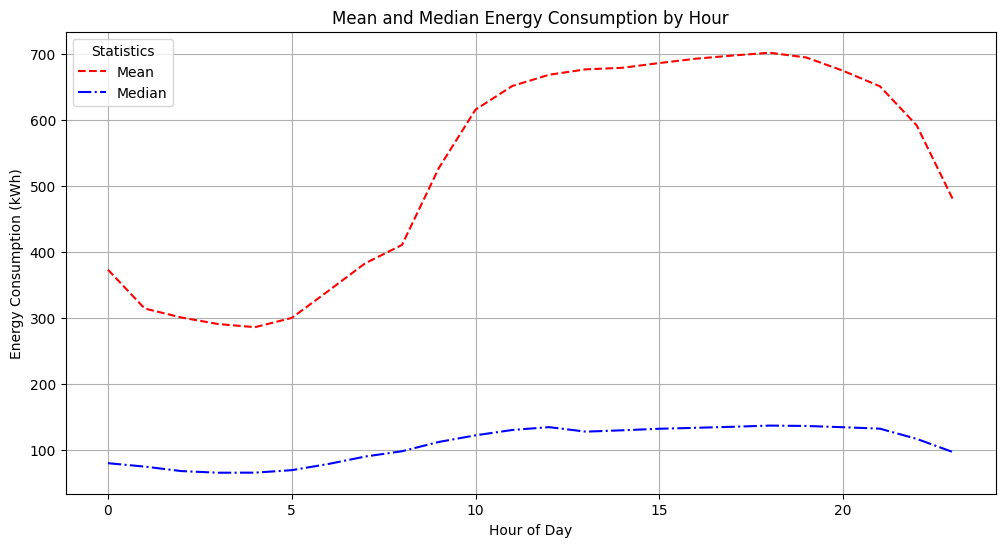

In [20]:
# Resample to hourly averages
hourly_avg = data.resample('H').mean()

# Group by hour of the day
hourly_avg['Hour'] = hourly_avg.index.hour
avg_profile = hourly_avg.groupby('Hour').mean()

# Calculate mean and median for each hour
hourly_mean = avg_profile.mean(axis=1)
hourly_median = avg_profile.median(axis=1)

# Plot mean and median
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(hourly_mean, label='Mean', linestyle='--', color='red')
ax.plot(hourly_median, label='Median', linestyle='-.', color='blue')

# Customize plot appearance
plt.title('Mean and Median Energy Consumption by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.legend(title='Statistics')

plt.show()

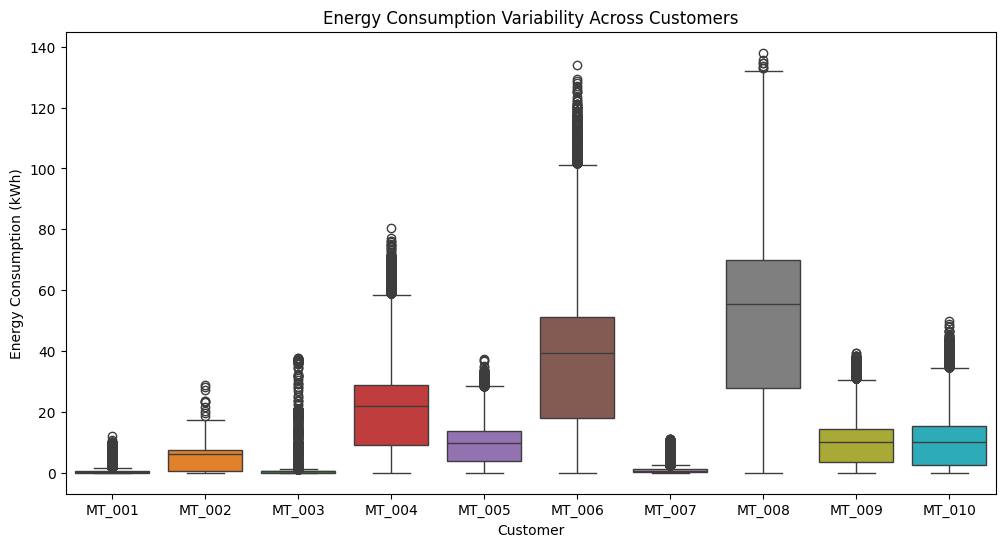

In [21]:
# Select a subset of customers
subset_customers = data.iloc[:, :10]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_customers / 4)  # Convert kW to kWh
plt.title('Energy Consumption Variability Across Customers')
plt.xlabel('Customer')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

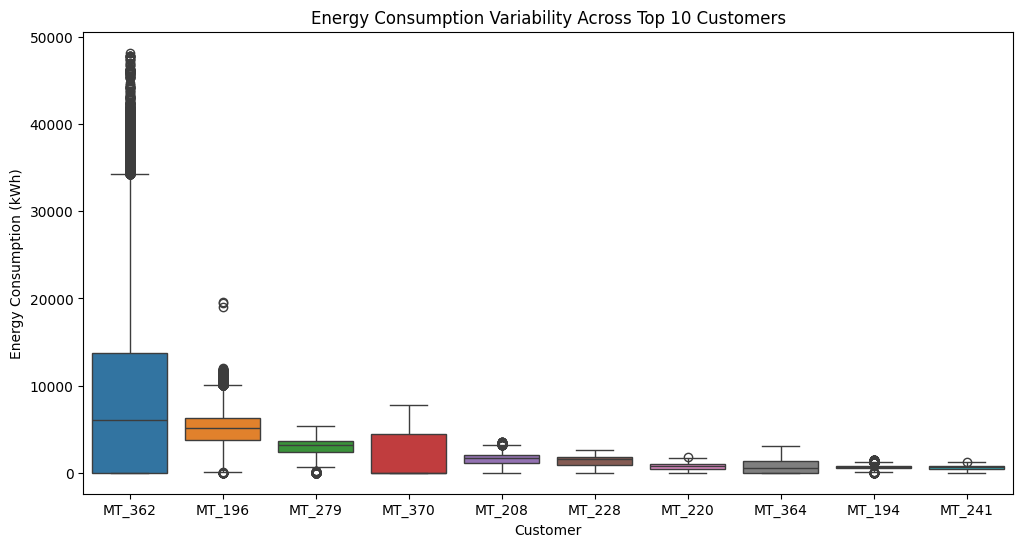

In [22]:
# Calculate total energy consumption for each customer
total_consumption = data.sum(axis=0) / 4  # Convert kW to kWh

# Select the top 10 customers with the highest energy consumption
top_10_customers = total_consumption.nlargest(10).index
subset_top_customers = data[top_10_customers]

# Plot boxplot for the top 10 customers
plt.figure(figsize=(12, 6))
sns.boxplot(data=subset_top_customers / 4)  # Convert kW to kWh
plt.title('Energy Consumption Variability Across Top 10 Customers')
plt.xlabel('Customer')
plt.ylabel('Energy Consumption (kWh)')
plt.show()

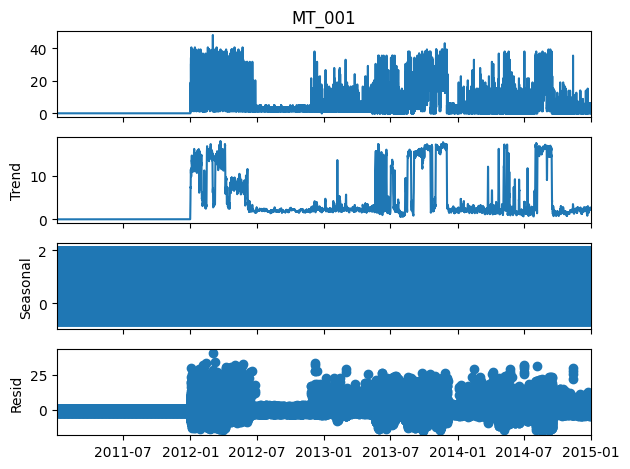

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time-series
decomposition = seasonal_decompose(data['MT_001'], model='additive', period=96)  # 96 measurements/day
decomposition.plot()
plt.show()

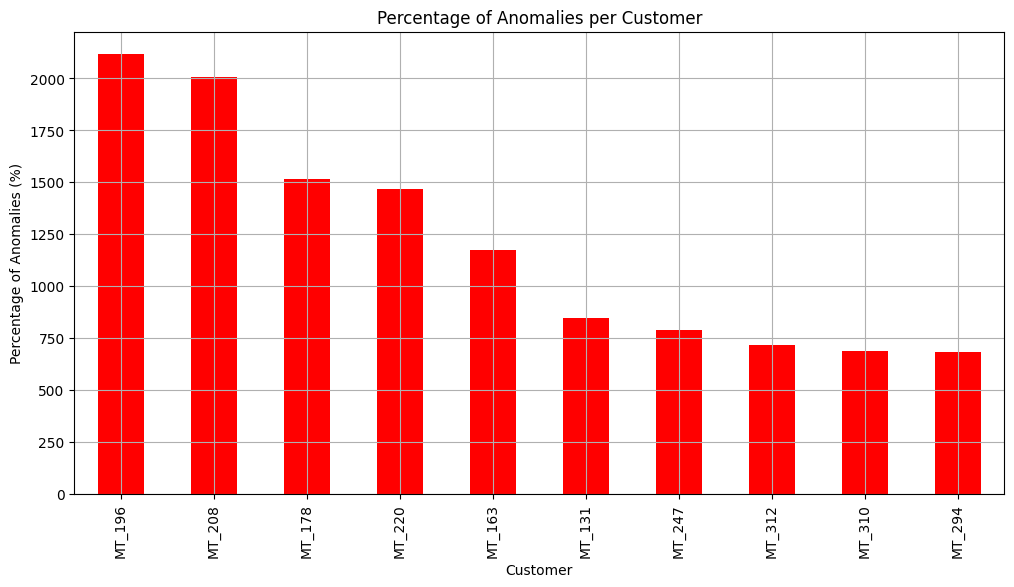

In [25]:
# Calculate percentage of anomalies per customer
# Calculate daily total consumption
daily_totals = data.resample('D').sum()
threshold = daily_totals.mean() + 3 * daily_totals.std()
anomalies = daily_totals[daily_totals > threshold]
anomalies = daily_totals[daily_totals > threshold]
anomaly_percentage = (anomalies.sum() / len(data)) * 100

# Plot bar chart
anomaly_percentage.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12, 6), color='red')
plt.title('Percentage of Anomalies per Customer')
plt.xlabel('Customer')
plt.ylabel('Percentage of Anomalies (%)')
plt.grid(True)
plt.show()
